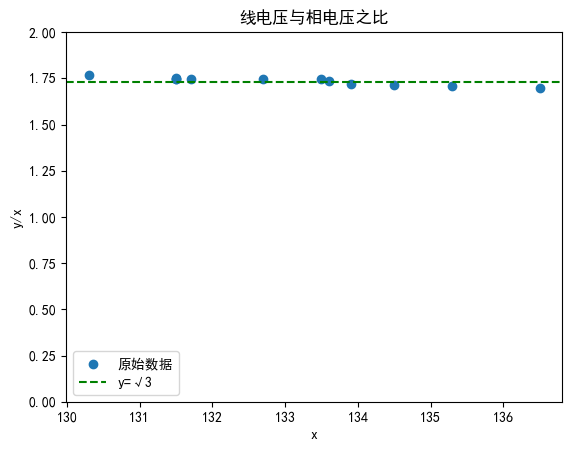

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# 设置 matplotlib 支持中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

x = np.array([132.7,133.9,131.5,136.5,130.3,131.7,133.6,134.5,131.5,133.5,135.3,131.5])
y = np.array([231.6,230.2,229.5,231.5,230.2,229.7,232.2,230.6,229.7,  233.4,231,  230])

# 新的纵坐标
y_new = y / x


plt.scatter(x, y_new, label='原始数据')
plt.axhline(np.sqrt(3), color='green', linestyle='--', label='y=√3')
plt.xlabel('x')
plt.ylabel('y/x')
plt.title('线电压与相电压之比')
plt.ylim(0, 2)
plt.legend()
plt.show()

理论线电流（A）： [0.29356505 0.48248109 0.39176529]
实验线电流（A）： [0.294 0.479 0.389]
理论-实验差值： [-0.00043495  0.00348109  0.00276529]


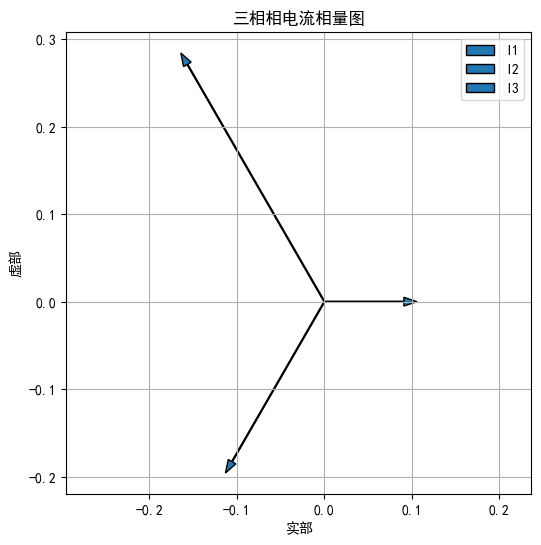

In [3]:

import numpy as np
import matplotlib.pyplot as plt

# 设置 matplotlib 支持中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 相电压
x = np.array([0.1058, 0.226, 0.328])
# 线电压
y = np.array([0.389, 0.294, 0.479])

# 假设每相阻抗均为1Ω
Z = np.array([1, 2, 3])

# 相电流
I = x 

# 相量表示（相位分别为0°, -120°, +120°）
angles = np.deg2rad([0, -120, 120])
I_vec = I * np.exp(1j * angles)

# 计算线电流
I_AB = I_vec[0] - I_vec[1]
I_BC = I_vec[1] - I_vec[2]
I_CA = I_vec[2] - I_vec[0]
I_line = np.array([np.abs(I_AB), np.abs(I_BC), np.abs(I_CA)])

print("理论线电流（A）：", I_line)

# 假设实验测得线电流
I_line_exp = np.array([ 0.294,0.479,0.389 ])
print("实验线电流（A）：", I_line_exp)

# 比较分析
diff = I_line - I_line_exp
print("理论-实验差值：", diff)

# 作相量图
plt.figure(figsize=(6,6))
for i in range(3):
    plt.arrow(0, 0, I_vec[i].real, I_vec[i].imag, head_width=0.01, length_includes_head=True, label=f'I{i+1}')
plt.xlabel('实部')
plt.ylabel('虚部')
plt.title('三相相电流相量图')
plt.grid()
plt.axis('equal')
plt.legend(['I1', 'I2', 'I3'])
plt.show()

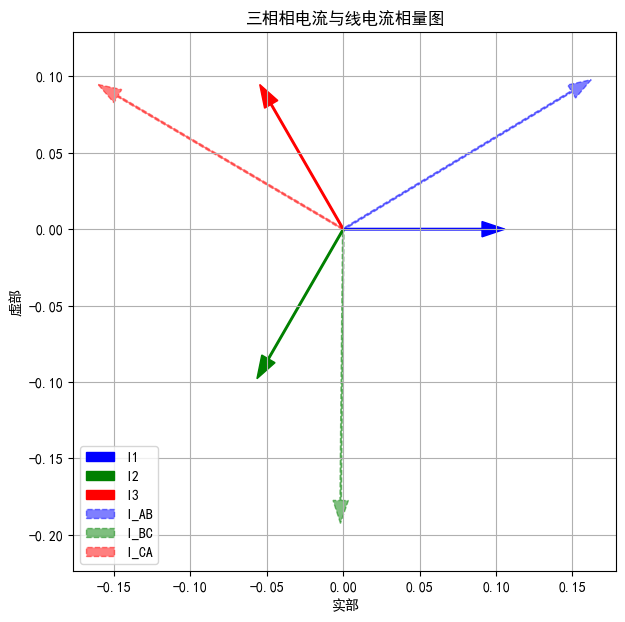

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 设置 matplotlib 支持中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 相电压
x = np.array([0.1058, 0.226, 0.328])
# 线电压
y = np.array([0.389, 0.294, 0.479])

# 假设每相阻抗分别为1, 2, 3 Ω
Z = np.array([1, 2, 3])

# 相电流
I = x / Z

# 相量表示（相位分别为0°, -120°, +120°）
angles = np.deg2rad([0, -120, 120])
I_vec = I * np.exp(1j * angles)

# 计算线电流（相量）
I_AB = I_vec[0] - I_vec[1]
I_BC = I_vec[1] - I_vec[2]
I_CA = I_vec[2] - I_vec[0]
I_line_vec = np.array([I_AB, I_BC, I_CA])

# 作相量图
plt.figure(figsize=(7,7))
colors = ['b', 'g', 'r']
for i in range(3):
    plt.arrow(0, 0, I_vec[i].real, I_vec[i].imag, 
              head_width=0.01, length_includes_head=True, color=colors[i], label=f'相电流 I{i+1}')
for i, (start, vec, color) in enumerate(zip([0, 1, 2], I_line_vec, colors)):
    plt.arrow(0, 0, vec.real, vec.imag, 
              head_width=0.01, length_includes_head=True, color=color, linestyle='dashed', alpha=0.5, label=f'线电流 I_line{i+1}')

plt.xlabel('实部')
plt.ylabel('虚部')
plt.title('三相相电流与线电流相量图')
plt.grid()
plt.axis('equal')
plt.legend(['I1', 'I2', 'I3', 'I_AB', 'I_BC', 'I_CA'])
plt.show()